# Tarea 7: Búsqueda local

En esta práctica se realiza la implementación de una optimización heurística para encontrar máximos locales de funciones, en particular de una función $f: \mathbb{R}^2 \rightarrow \mathbb{R}$. 

Las librerías utilizadas para esta práctica son:

In [2]:
library(rasterVis)
library(latticeExtra)
library(lattice)
library(sp)
library(viridisLite)
library(reshape2) 

En este caso, la función que se utiliza es: $f(x,y)= 3e^{(-(0.8y + 1)^2)-(0.8x)^2}(0.8x-1)^2 - \frac{1}{3}\cdot e^{-(0.8x+1)^2-(0.8y)^2}+e^{-(0.8x)^2-(0.8y)^2}(10(0.8x)^3-2(0.8x)+10(0.8y)^5)$ y su gráfica es la siguiente:

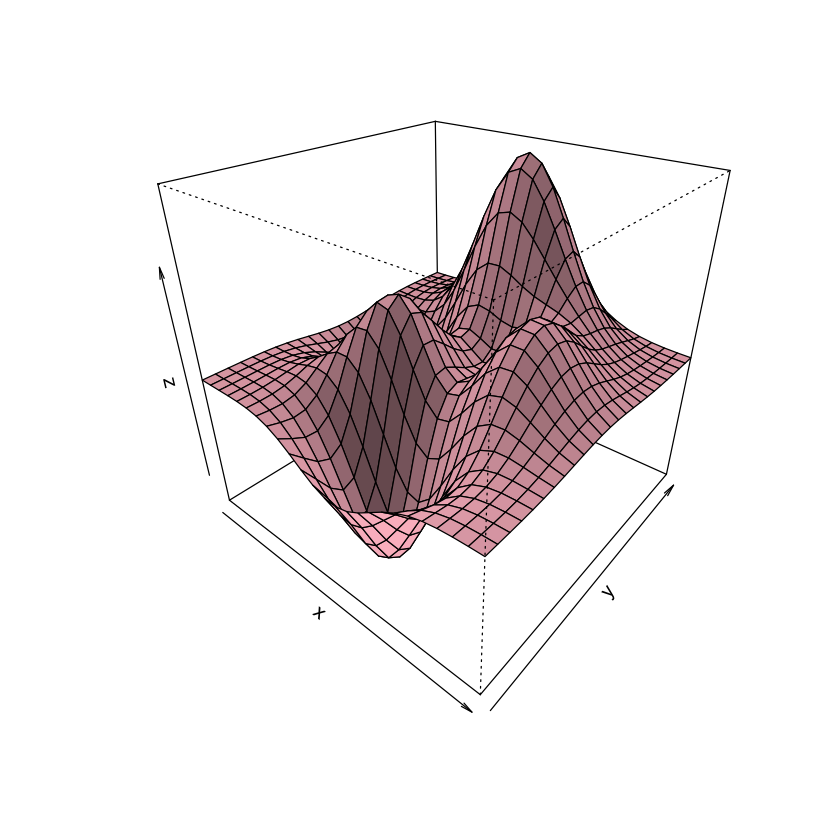

In [314]:
f <- function(x, y) {
    if (x < -3 || x>3 || y< -3 || y>3 ){return(-Inf)}
    else{
    return(3*exp(-(0.8*y+1)^2 -(0.8*x)^2)*(0.8*x-1)^2-(exp(-(0.8*x+1)^2-(0.8*y)^2)/3)+exp(-(0.8*x)^2-(0.8*y)^2)*(10*(0.8*x)^3-2*(0.8*x)+10*(0.8*y)^5))
    }
} 
x <- seq(-3, 3, 0.25)
y <-  x
z <- outer(x, y, f)

persp(x, y, z, shade=0.2, col='pink', theta=40, phi=30)



In [24]:
replica <- function(t){ 
    currx <- runif(1, -3, 3)
    curry <- runif(1, -3, 3)
    best  <- c()
    best[1] <- currx
    best[2] <- curry
    

    for (tiempo in 1:t) {
        a <- currx
        b <- curry
        deltax <- runif(1, 0, 0.2)
        deltay <- runif(1, 0, 0.2)
        left   <- currx - deltax
        right  <- currx + deltax
        up     <- curry + deltay
        down   <- curry - deltay

        posx   <- c(left,right,a)
        posy   <- c(up,down,b)
        
        pos_max <- max(f(left,up), f(left,down),f(left,b), f(right,up), f(right,down), f(right,b), f(a,up), f(a,down))
        
        for (x in posx){
            for (y in posy){
                if(f(x,y)==pos_max){
                    currx <- x
                    curry <- y
                }
            }
        }
        
        if(f(best[1],best[2])<= f(currx,curry)){
            best[1] <- currx
            best[2] <- curry
        }
    }
    return(best)
}

In [254]:
    x <- seq(-3, 3, length.out=500)
    y <- x
    z <- outer(x, y, f)
    dimnames(z) <- list(x, y)
    d <- melt(z)
    names(d) <- c("x", "y", "z")
    png("grafica.png", width=400, height=400)
    levelplot(z ~ x * y, data = d, col.regions = magma(200) )
    dev.off()

pdf 
  2

In [27]:
suppressMessages(library(doParallel))
registerDoParallel(makeCluster(detectCores() - 1))
    x <- seq(-3, 3, length.out=500)
    y <- x
    z <- outer(x, y, f)
    dimnames(z) <- list(x, y)
    d <- melt(z)
    names(d) <- c("x", "y", "z")
    replicas <- 100

for (m in 1:100) {
    tmax <- m
    resultados <- foreach(i = 1:replicas, .combine=c) %dopar% replica(tmax)
    valores <- foreach(j = 1:replicas, .combine=c) %dopar% k(resultados[2*j-1],resultados[2*j])

    m <- which.max(valores)
    
    puntos <- SpatialPoints(matrix(resultados, replicas, byrow=TRUE))
    mejor  <- SpatialPoints(matrix(c(resultados[2*m-1],resultados[2*m]), 1, byrow=TRUE))
    
    imagen <-   levelplot(z ~ x * y, data = d, col.regions = magma(200), main= paste(tmax, "pasos")) +
                layer(sp.points(mejor, pch=17, cex=3, col=rgb(1, 1, 1, 0.85)))+
                layer(sp.points(puntos, pch=20, cex=2, col="black"))

    
    png(paste("parallel_", tmax, ".png", sep=""), width=400, height=400)
    print(imagen)
    dev.off()
}

stopImplicitCluster()

In [261]:
suppressMessages(library(doParallel))
registerDoParallel(makeCluster(detectCores() - 1))
    x <- seq(-3, 3, length.out=500)
    y <- x
    z <- outer(x, y, f)
    dimnames(z) <- list(x, y)
    d <- melt(z)
    names(d) <- c("x", "y", "z")
    replicas <- 100

for (pot in 1:4) {
    tmax <- 10^pot
    resultados <- foreach(i = 1:replicas, .combine=c) %dopar% replica(tmax)
    valores <- foreach(j = 1:replicas, .combine=c) %dopar% k(resultados[2*j-1],resultados[2*j])

    m <- which.max(valores)
    
    puntos <- SpatialPoints(matrix(resultados, replicas, byrow=TRUE))
    mejor  <- SpatialPoints(matrix(c(resultados[2*m-1],resultados[2*m]), 1, byrow=TRUE))
    
    imagen <-   levelplot(z ~ x * y, data = d, col.regions = magma(200)) +
                layer(sp.points(mejor, pch=17, cex=3, col=rgb(1, 1, 1, 0.85)))+
                layer(sp.points(puntos, pch=20, cex=2, col="black"))

    
    png(paste("replicas_", tmax, ".png", sep=""), width=400, height=400)
    print(imagen)
    dev.off()
}

stopImplicitCluster()

## Reto 1

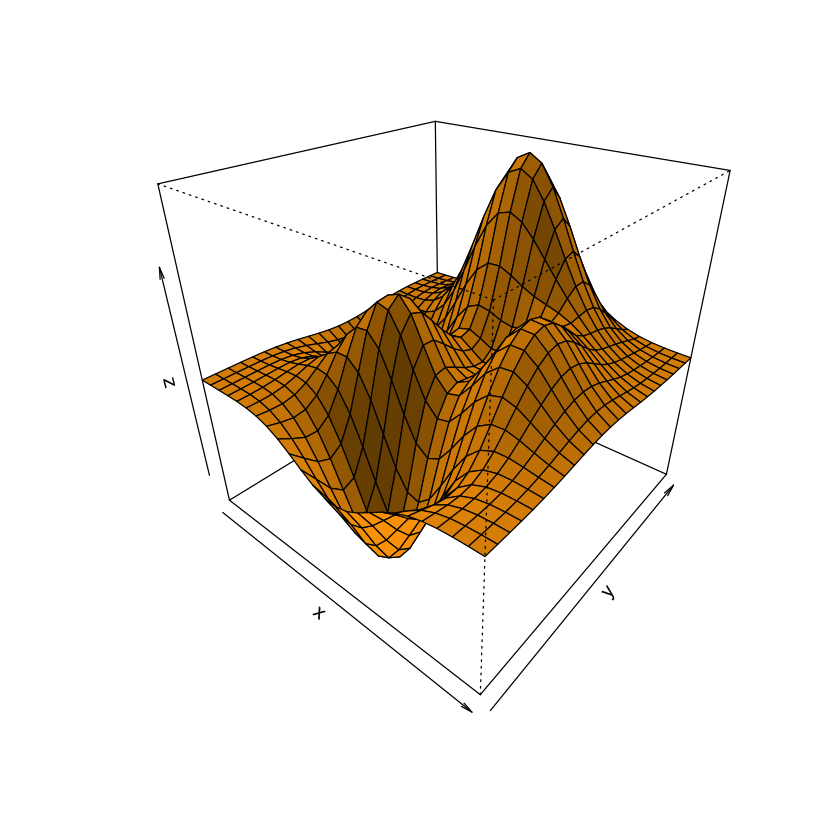

In [216]:
f <- function(x, y) {
    if (x < -3 || x>3 || y< -3 || y>3 ){return(-Inf)}
    else{
    return(3*exp(-(0.8*y+1)^2 -(0.8*x)^2)*(0.8*x-1)^2-(exp(-(0.8*x+1)^2-(0.8*y)^2)/3)+exp(-(0.8*x)^2-(0.8*y)^2)*(10*(0.8*x)^3-2*(0.8*x)+10*(0.8*y)^5))
    }
} 
x <- seq(-3, 3, 0.25)
y <-  x
z <- outer(x, y, f)

persp(x, y, z, shade=0.2, col='orange', theta=40, phi=30)



In [221]:
T <- 1
ji <- 0.995

reto <- function(tiempo){
    currx <- runif(1, -3, 3)
    curry <- runif(1, -3, 3)
    
    for (t in 1:tiempo){
        a <- currx
        b <- curry
        deltax <- runif(1, 0, 0.2)
        deltay <- runif(1, 0, 0.2)
        left   <- currx - deltax
        right  <- currx + deltax
        up     <- curry + deltay
        down   <- curry - deltay

        posx   <- c(left,right,a)
        posy   <- c(up,down,b)
        
        pos_max <- max(f(left,up), f(left,down),f(left,b), f(right,up), f(right,down), f(right,b), f(a,up), f(a,down))
        
        for (x in posx){
            for (y in posy){
                if(f(x,y)==pos_max){
                    vecinox <- x
                    vecinoy <- y
                }
            }
        }
        

        delta <- f(vecinox,vecinoy) - f(currx,curry)
            if (delta > 0) {
                currx <- vecinox
                curry <- vecinoy
            }
            else{
                if (runif(1) < exp(-delta/T)){
                    currx <- vecinox
                    curry <- vecinoy
                    T<-T*ji
                }
            }
    }
    posicion <- c(currx,curry)
    return(posicion)
}


In [259]:
datos <- data.frame()
for (T in c(1, 10, 100, 1000, 10000)){
    for (ji in c(0.7, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999)){
        for(j in 1:100){
            a<-reto(100)
            m1 <- abs(f(a[1],a[2])-maxglobal)
            m2 <- abs(f(a[1],a[2])-maxlocal1)
            m3 <- abs(f(a[1],a[2])-maxlocal2)
        datos <- rbind(datos, c(T,ji, f(a[1],a[2]),min(m1,m2,m3)))
        }
    }
}

In [246]:
names(datos) <- c("Temp Inicial", "ji", "max")

In [247]:
cor.test(datos$`Temp Inicial`, datos$max)


	Pearson's product-moment correlation

data:  datos$`Temp Inicial` and datos$max
t = 0.082459, df = 3498, p-value = 0.9343
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03173876  0.03452414
sample estimates:
        cor 
0.001394216 


In [248]:
cor.test(datos$ji, datos$max)


	Pearson's product-moment correlation

data:  datos$ji and datos$max
t = 2.3218, df = 3498, p-value = 0.0203
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.006103839 0.072265015
sample estimates:
       cor 
0.03922742 


## Reto 2

In [264]:
T <- 1
ji <- 0.7
data <- data.frame()
   for(pot in 1:4){
        for(j in 1:100){
            tmax <- 10^pot
            a<-reto(tmax)
            b<-replica(tmax)
            m1 <- abs(f(a[1],a[2])-maxglobal)
            m2 <- abs(f(b[1],b[2])-maxglobal)
 
       data <- rbind(data, c(j, tmax, m1, m2))
        }
    }
    


In [266]:
names(data)<- c("iteracion", "repeticiones", "base", "reto1")

In [311]:
png("b07.png", width = 600, height = 400)
boxplot(data$base[1:100], data$reto1[1:100], data$base[101:200], 
        data$reto1[101:200], data$base[201:300], data$reto1[201:300],  ylab="Diferencia con el máximo global", 
        xlab="Réplicas", names= c("10", "10", "100", "100", "1000", "1000", "10000", "10000"),
        data$base[301:400], data$reto1[301:400], col=c("rosybrown3", "thistle3", "rosybrown3", "thistle3",
                                                      "rosybrown3", "thistle3", "rosybrown3", "thistle3"))
legend(x = "topright", legend = c("Base", "Reto 1"), fill = c("rosybrown3", "thistle3"), 
       title = "Método")

dev.off()

pdf 
  2

In [276]:
T <- 1
ji <- 0.8
data1 <- data.frame()
   for(pot in 1:4){
        for(j in 1:100){
            tmax <- 10^pot
            a<-reto(tmax)
            b<-replica(tmax)
            m1 <- abs(f(a[1],a[2])-maxglobal)
            m2 <- abs(f(b[1],b[2])-maxglobal)
 
       data1 <- rbind(data1, c(j, tmax, m1, m2))
        }
    }
    


In [280]:
names(data1)<-c("Iteracion", "replica", "base", "reto1")

In [310]:
png("b08.png", width = 600, height = 400)
boxplot(data1$base[1:100], data1$reto1[1:100], data1$base[101:200], 
        data1$reto1[101:200], data1$base[201:300], data1$reto1[201:300], 
        data1$base[301:400], data1$reto1[301:400], ylab="Diferencia con el máximo global", 
        xlab="Réplicas", names= c("10", "10", "100", "100", "1000", "1000", "10000", "10000"),
        col=c("rosybrown3", "thistle3", "rosybrown3", "thistle3",
                                                      "rosybrown3", "thistle3", "rosybrown3", "thistle3"))
legend(x = "topright", legend = c("Base", "Reto 1"), fill = c("rosybrown3", "thistle3"), 
       title = "Método")
dev.off()

pdf 
  2

In [277]:
T <- 1
ji <- 0.9
data2 <- data.frame()
   for(pot in 1:4){
        for(j in 1:100){
            tmax <- 10^pot
            a<-reto(tmax)
            b<-replica(tmax)
            m1 <- abs(f(a[1],a[2])-maxglobal)
            m2 <- abs(f(b[1],b[2])-maxglobal)
 
       data2 <- rbind(data2, c(j, tmax, m1, m2))
        }
    }
    


In [282]:
names(data2)<-c("Iteracion", "replica", "base", "reto1")

In [309]:
png("b09.png", width = 600, height = 400)
boxplot(data2$base[1:100], data2$reto1[1:100], data2$base[101:200], 
        data2$reto1[101:200], data2$base[201:300], data2$reto1[201:300], ylab="Diferencia con el máximo global", 
        xlab="Réplicas", names= c("10", "10", "100", "100", "1000", "1000", "10000", "10000"),
        data2$base[301:400], data2$reto1[301:400], col=c("rosybrown3", "thistle3", "rosybrown3", "thistle3",
                                                      "rosybrown3", "thistle3", "rosybrown3", "thistle3"))
legend(x = "topright", legend = c("Base", "Reto 1"), fill = c("rosybrown3", "thistle3"), 
       title = "Método")
dev.off()

pdf 
  2

In [313]:
t.test(data2$base, data2$reto1)


	Welch Two Sample t-test

data:  data2$base and data2$reto1
t = 2.2767, df = 796.26, p-value = 0.02307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05379843 0.72702041
sample estimates:
mean of x mean of y 
  3.34508   2.95467 
